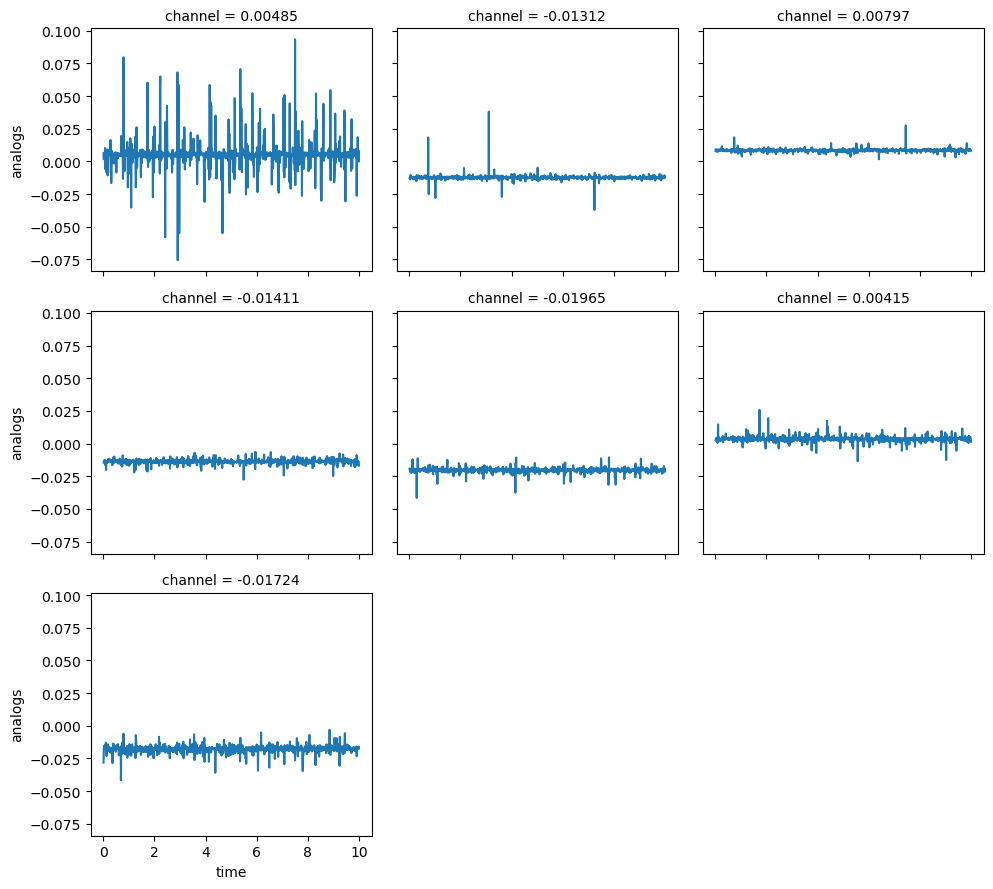

ValueError: the `freq` param is optional only if `rate` is available in the attrs dictionnary (array.attrs`)

In [4]:
import numpy as np
from pyomeca import Analogs
import matplotlib.pyplot as plt

muscles = [
    "GM",
    "Ip",
    "BF",
    "VL",
    "St",
    "TA",
    "Gs",
    "Gr"
]

# Load Data

data_path = "./CoM-M3-WT-20220420-3.csv"
emg = Analogs.from_csv(data_path, header=0, time_column=0, first_row=1, first_column=1)

# Plot EMG
emg.plot(x="time", col="channel", col_wrap=3)
plt.show()

# Proccessing the EMG
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[30, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize()
)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

emg_processed.mean("channel").plot(ax=axes[0])
axes[0].set_title("Mean EMG activation")

emg_processed.plot.hist(ax=axes[1], bins=50)
axes[1].set_title("EMG activation distribution")
emg_processed.plot(x="time", col="channel", col_wrap=3)

emg_processed.name = "EMG"
emg_processed.attrs["units"] = "%"
emg_processed.time.attrs["units"] = "seconds"

emg_processed.plot(x="time", col="channel", col_wrap=3)